# **Project: Analyzing Income Patterns and Socioeconomic Factors to Find Donors for Charity**

## **Problem**
In this project, we will apply explainatory data analysis and machine learning algorithms to accurately identify the individuals income using data collected from the 1994 U.S. Census. we will choose the best algorithm by comparing results and try to optimize that algorithm to best model the data. Our goal is to construct a model that can predicts whether and idividual makes more than $50,000. This can help funding organizations that survive on donations, understanding an individual income can help idenfity the quantity of donation to request.


## **Data source**
The dataset can be found [here.](https://archive.ics.uci.edu/dataset/20/census+income)

---

## **Data Exploration**

- The dataset contains **45,222** data points and **14** features, providing demographic and financial information about individuals.
- Below is a detailed explanation of each column to help understand the data better:

**Features**
- `age`: Age
- `workclass`: Working Class (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)
- `education_level`: Level of Education (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool)
- `education-num`: Number of educational years completed
- `marital-status`: Marital status (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)
- `occupation`: Work Occupation (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)
- `relationship`: Relationship Status (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)
- `race`: Race (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
- `sex`: Sex (Female, Male)
- `capital-gain`: Monetary Capital Gains
- `capital-loss`: Monetary Capital Losses
- `hours-per-week`: Average Hours Per Week Worked
- `native-country`: Native Country (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)

**Target Variable**
- `income`: Income Class (<=50K, >50K)

In [ ]:
# Importing libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from scipy.stats import shapiro
import scipy.stats as stats

In [ ]:
# Loading data set
data = pd.read_csv("/census.csv")
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


 - **5** numeric and **9** categorical features

In [ ]:
data.describe() # for numeric columns

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
data.describe(include='object') # for categorical columns

,workclass,education_level,marital-status,occupation,relationship,race,sex,native-country,income
count,45222,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,33307,14783,21055,6020,18666,38903,30527,41292,34014


### **Handling Missing Values and Duplicates**

In [ ]:
print("number of nulls in the data is " ,data.isna().sum().sum())

 number of nulls in the data is  0


In [ ]:
data_cleaned = data.copy()
data_cleaned.dropna(inplace=True)
print(" number of duplications in the data is " ,data_cleaned.duplicated().sum())
# now we will drop the duplicates
data_cleaned.drop_duplicates(inplace=True)
print(" number of duplications in the data after cleaning is " ,data_cleaned.duplicated().sum())

 number of duplications in the data is  5982
 number of duplications in the data after cleaning is  0


## **Visualizations and insights**

### Distributions for numercal columns

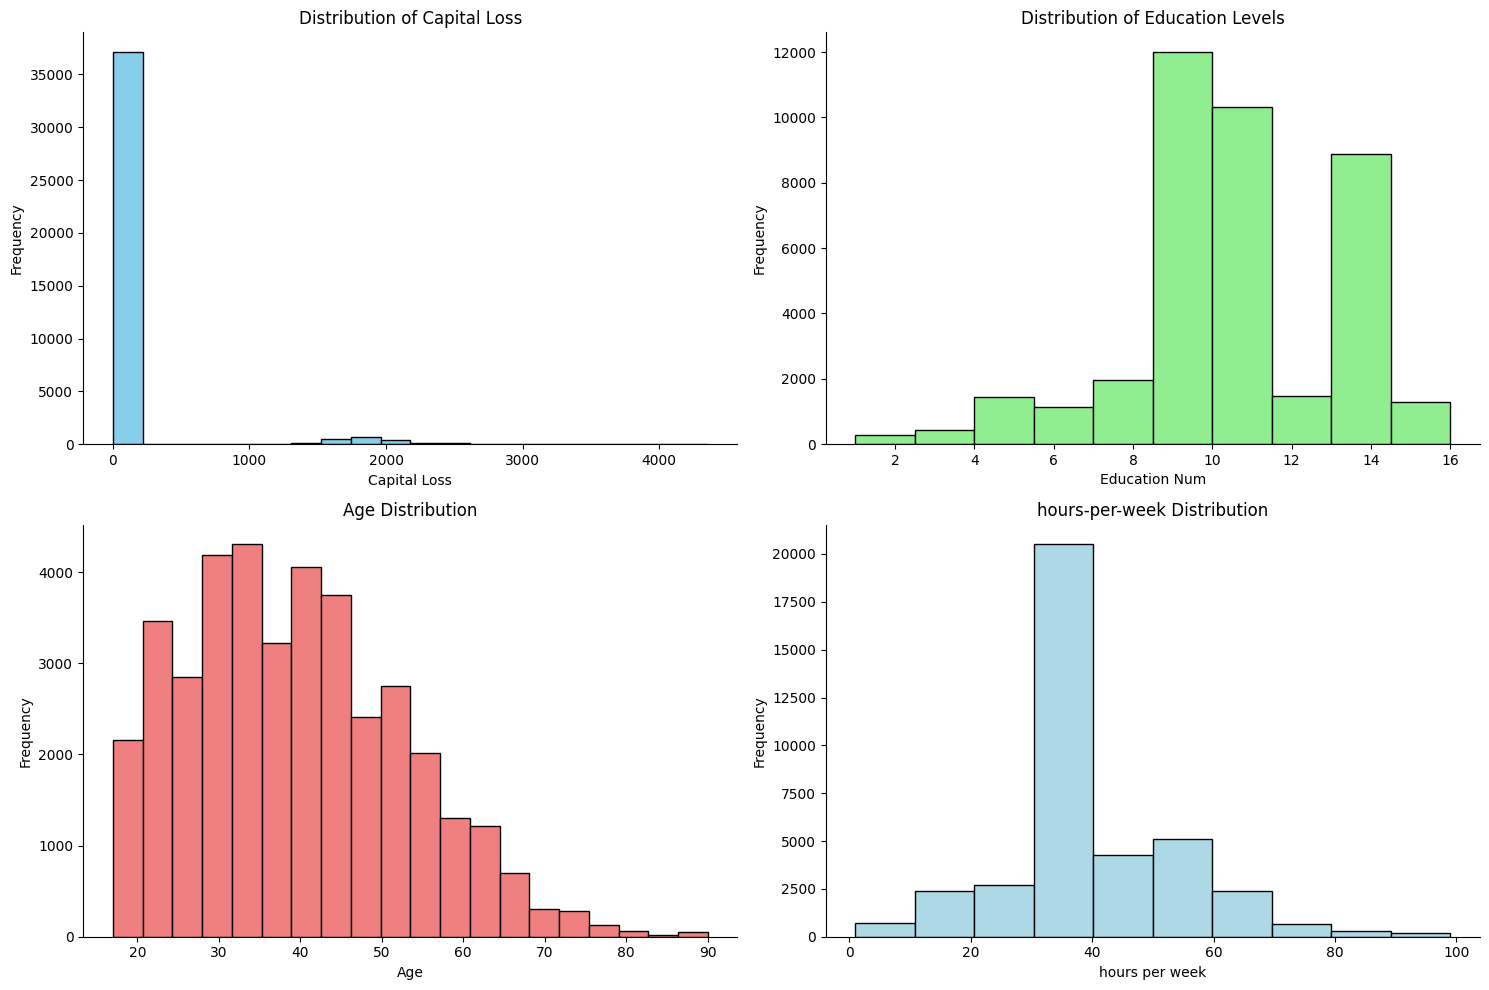

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot histogram for 'capital-loss'
axes[0, 0].hist(data_cleaned['capital-loss'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Capital Loss')
axes[0, 0].set_xlabel('Capital Loss')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].spines[['top', 'right']].set_visible(False)

# Plot histogram for 'education-num'
axes[0, 1].hist(data_cleaned['education-num'], color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Distribution of Education Levels')
axes[0, 1].set_xlabel('Education Num')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].spines[['top', 'right']].set_visible(False)

# Plot histogram for 'age'
axes[1, 0].hist(data_cleaned['age'], bins=20, color='lightcoral', edgecolor='black')
axes[1, 0].set_title('Age Distribution')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].spines[['top', 'right']].set_visible(False)

# Plot histogram for 'education-num'
axes[1, 1].hist(data_cleaned['hours-per-week'], bins=10, color='lightblue', edgecolor='black')
axes[1, 1].set_title('hours-per-week Distribution')
axes[1, 1].set_xlabel('hours per week')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].spines[['top', 'right']].set_visible(False)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

- **Looking at the histograms we can conclude that**:
  -  the majority of people have had completed **10** educational years by studying the `Education-num` feature
  - the majority of people ages are between **30 - 35**
  - the majority of people work for approximatly **40 hours per week**
  - the majority of people have **0 capital loss**

### **Distributions for categorical columns**

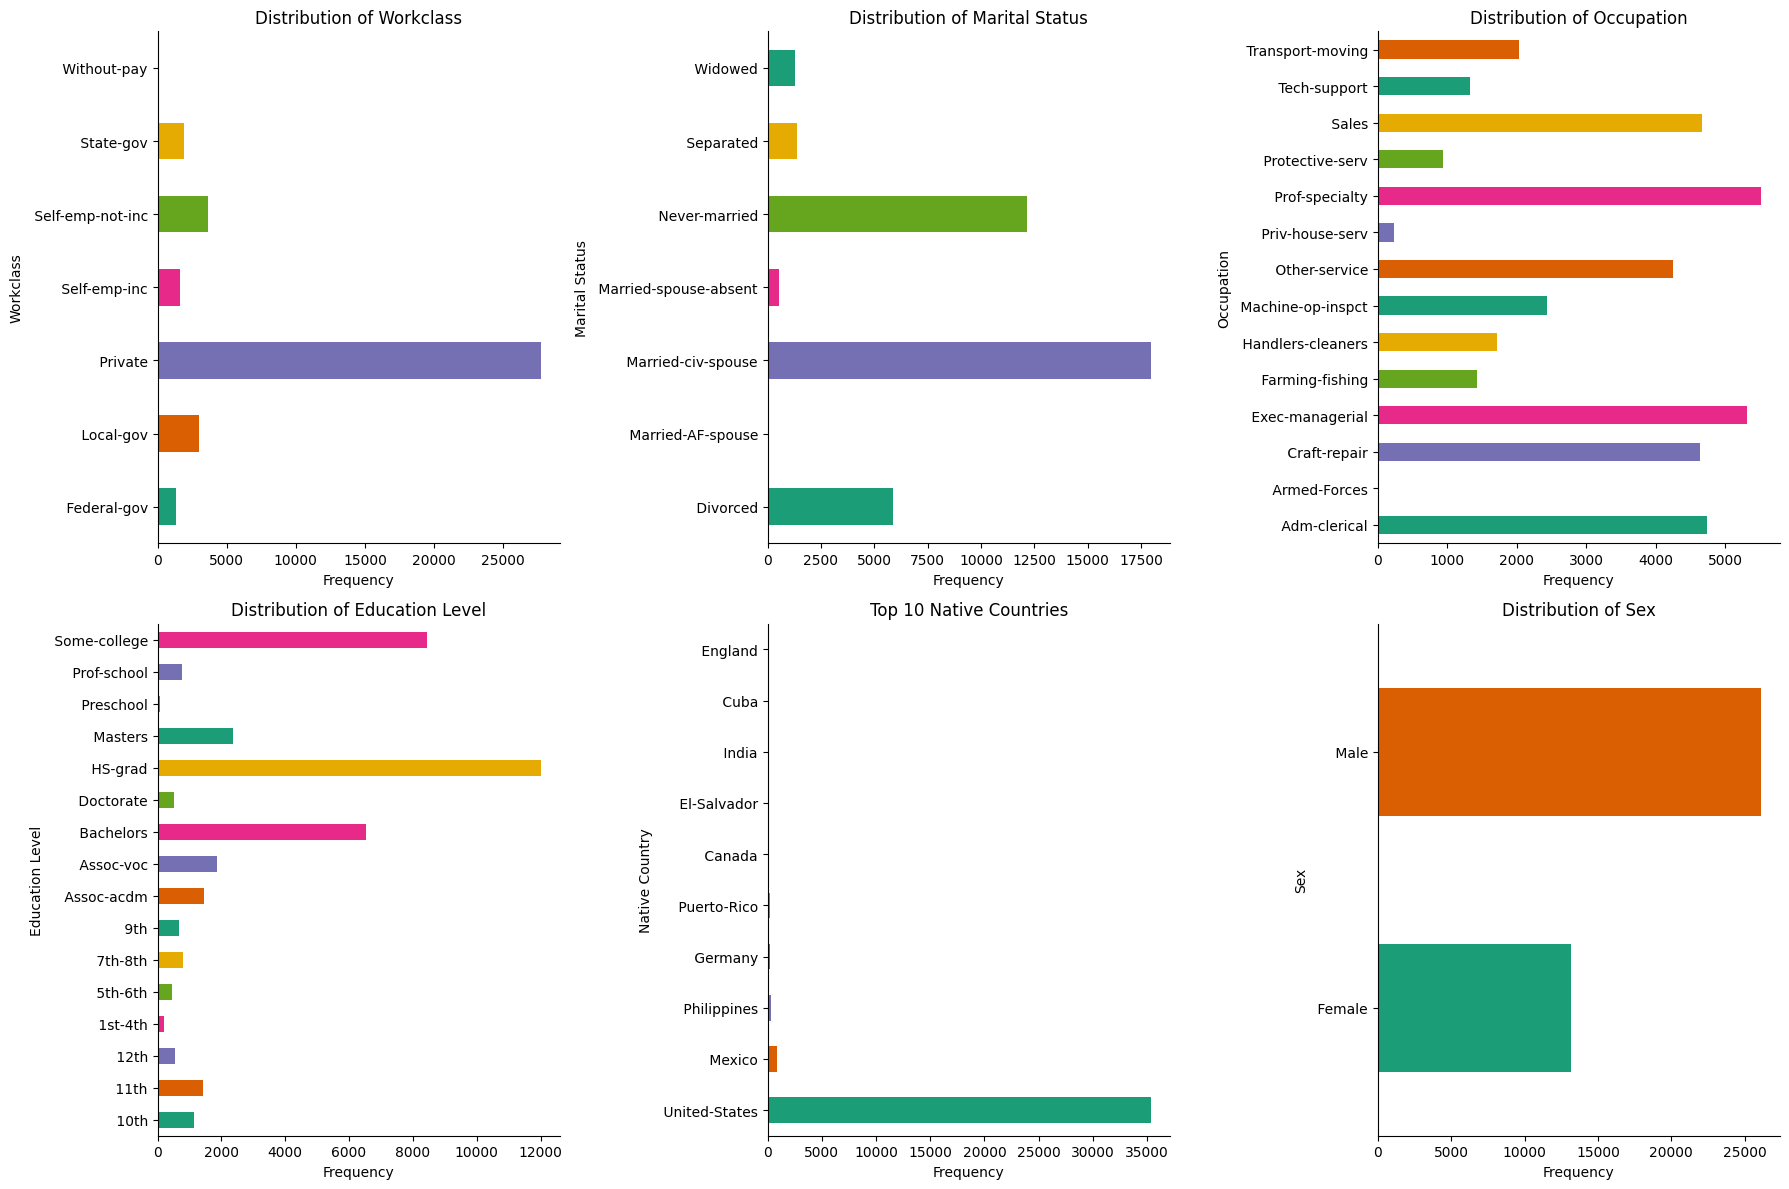

In [ ]:
# Set a consistent color palette
palette = sns.palettes.mpl_palette('Dark2')

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot for 'workclass'
data_cleaned.groupby('workclass').size().plot(kind='barh', color=palette, ax=axes[0, 0], title='Distribution of Workclass')
axes[0, 0].spines[['top', 'right']].set_visible(False)
axes[0, 0].set_xlabel('Frequency')
axes[0, 0].set_ylabel('Workclass')

# Plot for 'marital-status'
data_cleaned.groupby('marital-status').size().plot(kind='barh', color=palette, ax=axes[0, 1], title='Distribution of Marital Status')
axes[0, 1].spines[['top', 'right']].set_visible(False)
axes[0, 1].set_xlabel('Frequency')
axes[0, 1].set_ylabel('Marital Status')

# Plot for 'occupation'
data_cleaned.groupby('occupation').size().plot(kind='barh', color=palette, ax=axes[0, 2], title='Distribution of Occupation')
axes[0, 2].spines[['top', 'right']].set_visible(False)
axes[0, 2].set_xlabel('Frequency')
axes[0, 2].set_ylabel('Occupation')

# Plot for 'education level'
data_cleaned.groupby('education_level').size().plot(kind='barh', color=palette, ax=axes[1, 0], title='Distribution of Education Level')
axes[1, 0].spines[['top', 'right']].set_visible(False)
axes[1, 0].set_xlabel('Frequency')
axes[1, 0].set_ylabel('Education Level')

# Plot for top 10 'native-country'
data_cleaned['native-country'].value_counts().head(10).plot(kind='barh', color=palette, ax=axes[1, 1], title='Top 10 Native Countries')
axes[1, 1].spines[['top', 'right']].set_visible(False)
axes[1, 1].set_xlabel('Frequency')
axes[1, 1].set_ylabel('Native Country')

# Plot for 'sex'
data_cleaned.groupby('sex').size().plot(kind='barh', color=palette, ax=axes[1, 2], title='Distribution of Sex')
axes[1, 2].spines[['top', 'right']].set_visible(False)
axes[1, 2].set_xlabel('Frequency')
axes[1, 2].set_ylabel('Sex')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [ ]:
data_income_encoded = data_cleaned.copy()
# Convert the 'income' column to integer using LabelEncoder
data_income_encoded['income'] = LabelEncoder().fit_transform(data_income_encoded['income'])
data_income_encoded["income"].value_counts()

,count
income,
0,29265
1,9975


In [ ]:
#income is now a numerical column
data_income_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39240 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              39240 non-null  int64  
 1   workclass        39240 non-null  object 
 2   education_level  39240 non-null  object 
 3   education-num    39240 non-null  float64
 4   marital-status   39240 non-null  object 
 5   occupation       39240 non-null  object 
 6   relationship     39240 non-null  object 
 7   race             39240 non-null  object 
 8   sex              39240 non-null  object 
 9   capital-gain     39240 non-null  float64
 10  capital-loss     39240 non-null  float64
 11  hours-per-week   39240 non-null  float64
 12  native-country   39240 non-null  object 
 13  income           39240 non-null  int64  
dtypes: float64(4), int64(2), object(8)
memory usage: 4.5+ MB


In [ ]:
#grouping numerical features together
numeric_cols = data_income_encoded.select_dtypes(include=['int64', 'float64'])
numeric_cols.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income
0,39,13.0,2174.0,0.0,40.0,0
1,50,13.0,0.0,0.0,13.0,0
2,38,9.0,0.0,0.0,40.0,0
3,53,7.0,0.0,0.0,40.0,0
4,28,13.0,0.0,0.0,40.0,0


In [ ]:
#grouping continuous numerical featues together (will be used later in measuring models accuracy)
numeric_continuous_cols = numeric_cols.drop(['education-num', 'income'], axis=1)
numeric_continuous_cols.head()

,age,capital-gain,capital-loss,hours-per-week
0,39,2174.0,0.0,40.0
1,50,0.0,0.0,13.0
2,38,0.0,0.0,40.0
3,53,0.0,0.0,40.0
4,28,0.0,0.0,40.0


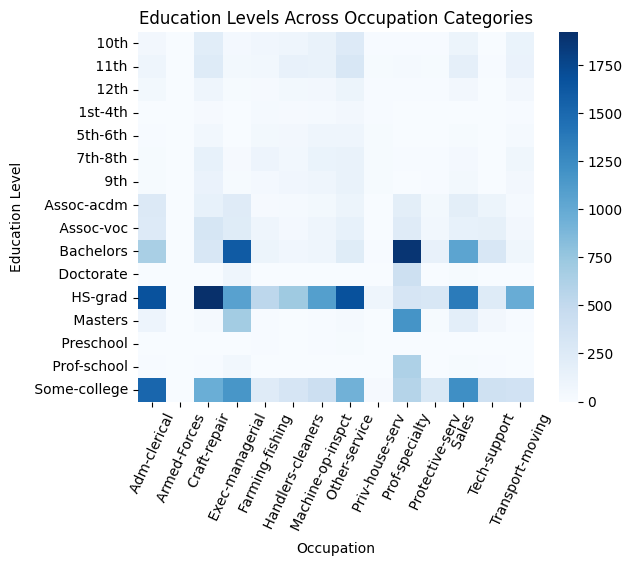

In [ ]:
# Cross-tabulate education levels and occupation
edu_occ_freq = pd.crosstab(data['education_level'], data['occupation'])

# Heatmap
sns.heatmap(edu_occ_freq, cmap='Blues', annot=False, fmt='d', cbar=True)
plt.title('Education Levels Across Occupation Categories')
plt.xlabel('Occupation')
plt.ylabel('Education Level')
plt.xticks(rotation=65)
plt.show()

<Axes: xlabel='age', ylabel='hours-per-week'>

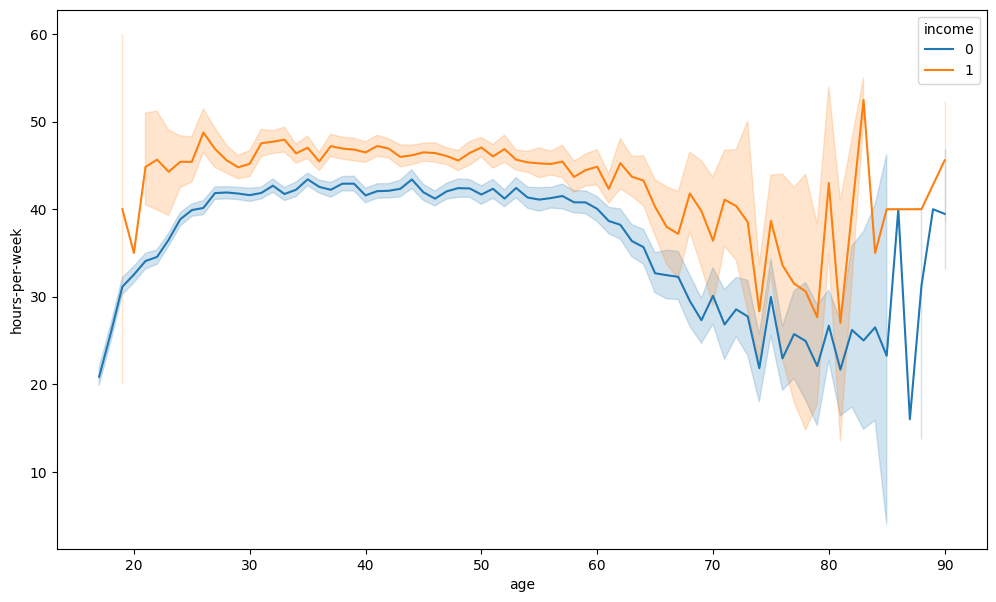

In [ ]:
# show the avg hours work by income and age

plt.figure(figsize=(12,7))
sns.lineplot(data=data_income_encoded,x="age",y="hours-per-week",hue="income")

### Checking the normality by (Shapiro-Wilk Test by P-value)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 45222.
  res = hypotest_fun_out(*samples, **kwds)


Feature 'age' is NOT normally distributed (p = 0.00000).
Feature 'workclass' is not numeric, skipping Shapiro-Wilk test.
Feature 'education_level' is not numeric, skipping Shapiro-Wilk test.
Feature 'education-num' is NOT normally distributed (p = 0.00000).
Feature 'marital-status' is not numeric, skipping Shapiro-Wilk test.
Feature 'occupation' is not numeric, skipping Shapiro-Wilk test.
Feature 'relationship' is not numeric, skipping Shapiro-Wilk test.
Feature 'race' is not numeric, skipping Shapiro-Wilk test.
Feature 'sex' is not numeric, skipping Shapiro-Wilk test.
Feature 'capital-gain' is NOT normally distributed (p = 0.00000).
Feature 'capital-loss' is NOT normally distributed (p = 0.00000).
Feature 'hours-per-week' is NOT normally distributed (p = 0.00000).
Feature 'native-country' is not numeric, skipping Shapiro-Wilk test.
Feature 'income' is not numeric, skipping Shapiro-Wilk test.

Number of non-normal features: 5 out of 14
Proportion of non-normal features: 35.71%


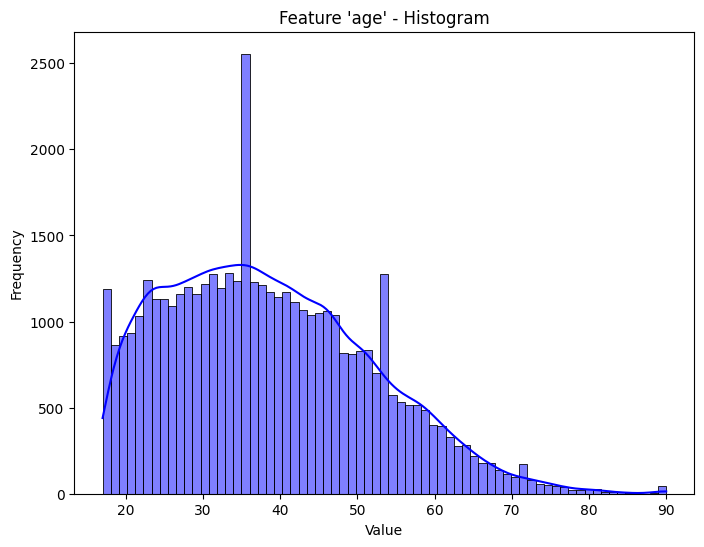

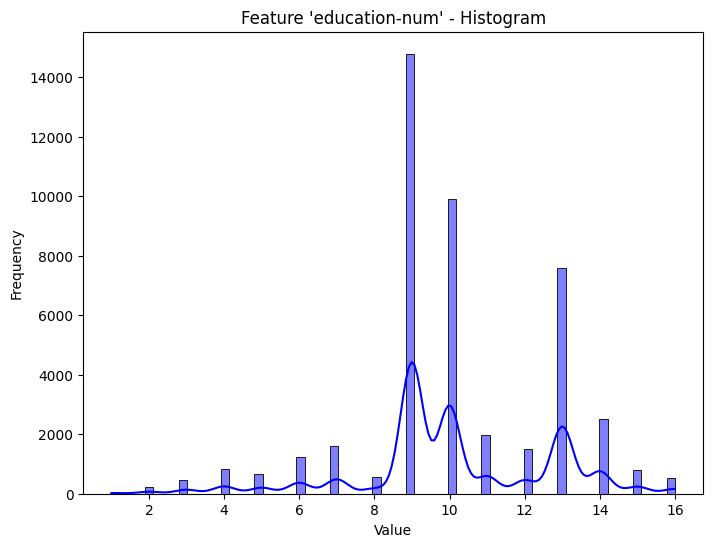

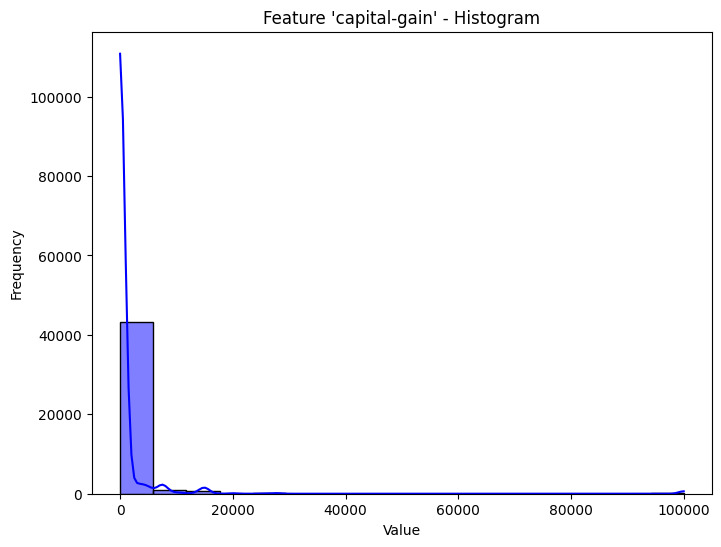

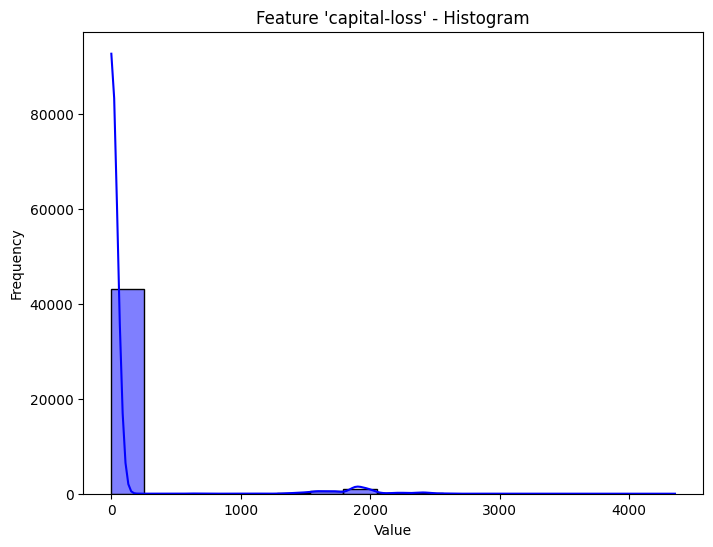

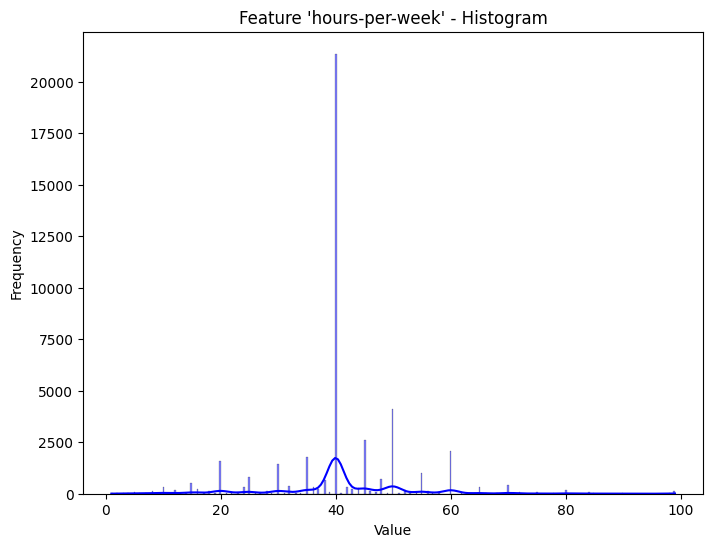

In [ ]:
# Set a significance level for the normality test
alpha = 0.05  # 5% significance level

# Initialize a list to store results
non_normal_features = []

# Iterate through each column in the dataset
for column in data.columns:
    # Ensure the column contains numeric data
    if pd.api.types.is_numeric_dtype(data[column]):
        # Remove or fill NaN values before testing
        column_data = data[column].dropna()  # Dropping NaN values

        # Perform the Shapiro-Wilk test
        if len(column_data) >= 3:  # Shapiro test needs at least 3 data points
            stat, p_value = shapiro(column_data)

            # Check if the p-value is below the significance level (alpha)
            if p_value < alpha:
                non_normal_features.append(column)
                print(f"Feature '{column}' is NOT normally distributed (p = {p_value:.5f}).")
            else:
                print(f"Feature '{column}' is normally distributed (p = {p_value:.5f}).")
        else:
            print(f"Feature '{column}' has fewer than 3 data points, skipping Shapiro-Wilk test.")
    else:
        print(f"Feature '{column}' is not numeric, skipping Shapiro-Wilk test.")

# Summary of non-normal features
print(f"\nNumber of non-normal features: {len(non_normal_features)} out of {data.shape[1]}")
print(f"Proportion of non-normal features: {len(non_normal_features) / data.shape[1]:.2%}")

# Visualize distributions of non-normal features
for column in non_normal_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True, color="blue")
    plt.title(f"Feature '{column}' - Histogram")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

## **Prepare data for modeling**

#### 1. Check the skewness

In [ ]:
# in numeric columns only
# Skewness indicates that the distribution of data is not symmetrical and may have a long tail on one side.
skewness = data_income_encoded[numeric_continuous_cols.columns].skew()
skewness

,0
age,0.513322
capital-gain,11.045685
capital-loss,4.181972
hours-per-week,0.358671


- Highly Positive Skew in (capital-gain 11.05 ,capital-loss 4.18 )

- For highly-skewed feature distributions such as `capital-gain` and `capital-loss`, it is common practice to apply a logarithmic transformation on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers.

In [ ]:
# Log-transforming the skewed features
data_log_transformed = data_income_encoded.copy()
data_log_transformed['capital-gain'] = np.log1p(data_log_transformed['capital-gain'])  # Apply log(x + 1) transformation
data_log_transformed['capital-loss'] = np.log1p(data_log_transformed['capital-loss'])  # Apply log(x + 1) transformation

In [ ]:
data_log_transformed[numeric_continuous_cols.columns].skew()

,0
age,0.513322
capital-gain,2.825415
capital-loss,3.949030
hours-per-week,0.358671


### 2- features Scaling

In [ ]:
numeric_continuous_cols.describe() # notice the min and max of each feature before scale

,age,capital-gain,capital-loss,hours-per-week
count,39240.000000,39240.000000,39240.000000,39240.000000
mean,39.309225,1253.314246,101.261340,41.206091
std,13.298041,7993.997264,431.434412,12.458021
min,17.000000,0.000000,0.000000,1.000000
25%,29.000000,0.000000,0.000000,40.000000
50%,38.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [ ]:
# normalization using min-max scaling
data_normalized = data_log_transformed.copy()
scaler = MinMaxScaler() # default=(0, 1)
#normalizing only continuous features
data_normalized[numeric_continuous_cols.columns] = scaler.fit_transform(data_normalized[numeric_continuous_cols.columns])


## data normalized icluding all numerical features such as 'education-num' and 'income'
data_normalized_All = data_log_transformed.copy()
data_normalized_All[numeric_cols.columns] = scaler.fit_transform(data_normalized_All[numeric_cols.columns])
# data_normalized_All.describe()

In [ ]:
continuous_data_normalized = data_normalized[numeric_continuous_cols.columns]
continuous_data_normalized.describe() # after standrize the numeric features

,age,capital-gain,capital-loss,hours-per-week
count,39240.000000,39240.000000,39240.000000,39240.000000
mean,0.305606,0.073374,0.048500,0.410266
std,0.182165,0.227281,0.202906,0.127123
min,0.000000,0.000000,0.000000,0.000000
25%,0.164384,0.000000,0.000000,0.397959
50%,0.287671,0.000000,0.000000,0.397959
75%,0.424658,0.000000,0.000000,0.448980
max,1.000000,1.000000,1.000000,1.000000


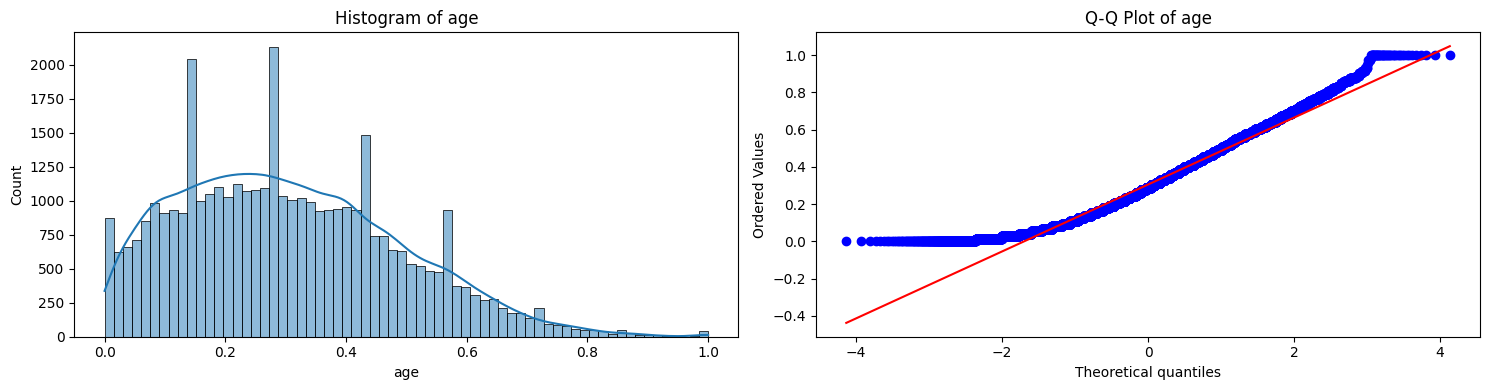

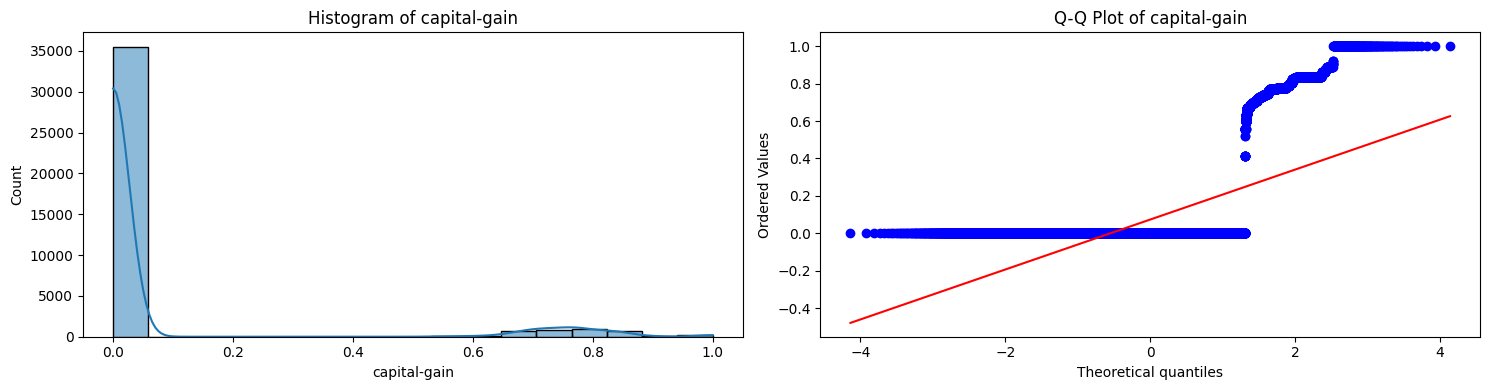

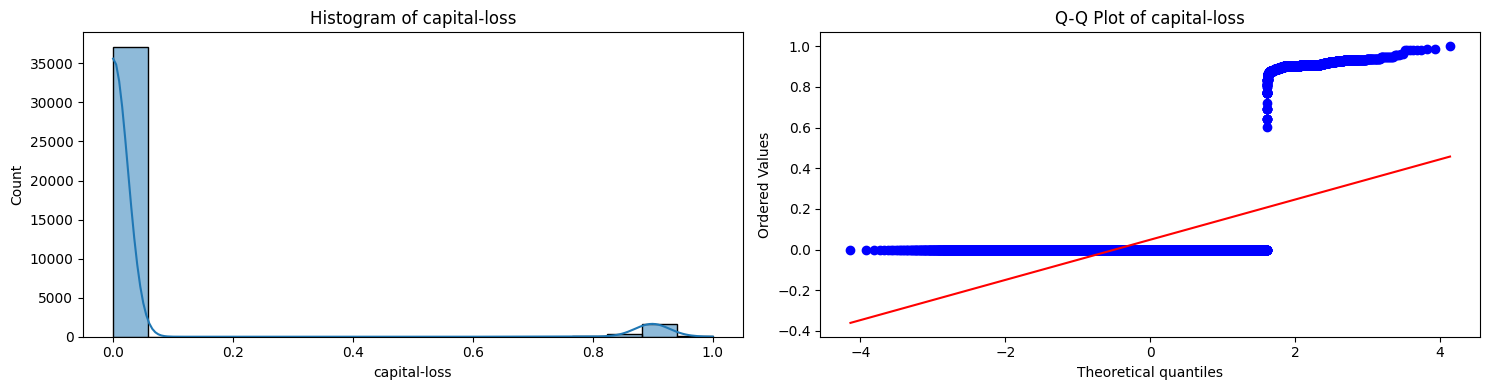

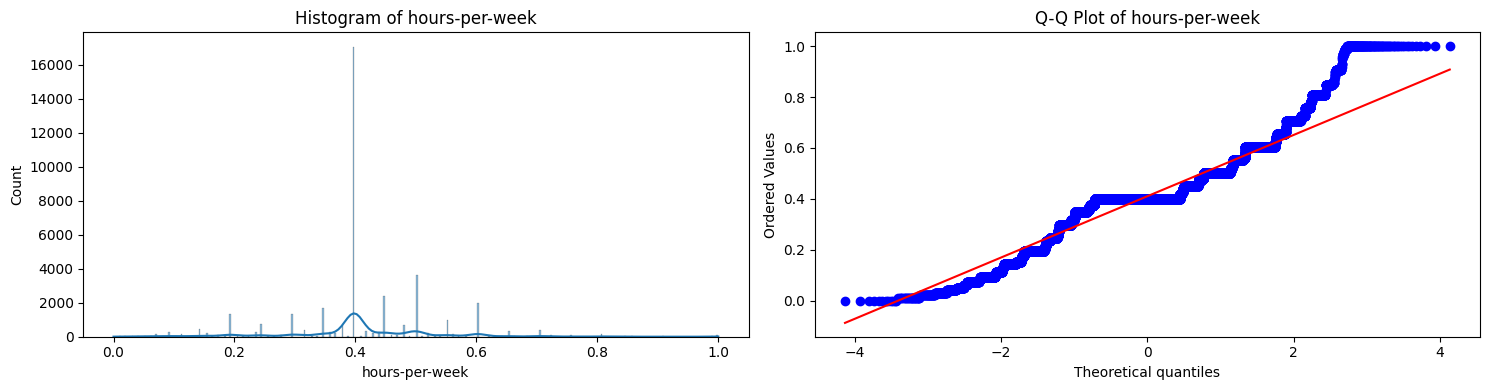

In [ ]:
def plot_normality_checks(data, column_name):
    """
    Plots histogram, Q-Q plot, and box plot to assess normality for a given column.

    Args:
        data: Pandas DataFrame containing the data.
        column_name: Name of the column to analyze.
    """

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

    # Histogram
    sns.histplot(data[column_name], kde=True, ax=axes[0])
    axes[0].set_title(f"Histogram of {column_name}")

    # Q-Q Plot
    stats.probplot(data[column_name], plot=axes[1])
    axes[1].set_title(f"Q-Q Plot of {column_name}")

    plt.tight_layout()
    plt.show()

for column in continuous_data_normalized:
    plot_normality_checks(continuous_data_normalized, column)

### 3- Encoding categorical columns

In [ ]:
# Label encoding for binary columns
le = LabelEncoder()
# data['income'] = le.fit_transform(data['income']) # we applied it before
data_fully_encoded = data_normalized.copy()
data_fully_encoded_dummies = data_normalized.copy()
data_full_encoded_All = data_normalized_All.copy()


# One-hot encoding for multi-class categorical columns with 'sex' as label encoded included
# data_fully_encoded['sex'] = le.fit_transform(data_fully_encoded['sex'])
# data_fully_encoded = pd.get_dummies(data_fully_encoded, columns=['workclass', 'education_level', 'marital-status',
#                                      'occupation', 'relationship', 'race', 'native-country','education-num'],
#                       drop_first=True, dtype=int)

#data where sex is treated with one-hot encoding with one-hot encoding
data_fully_encoded_dummies = pd.get_dummies(data_fully_encoded_dummies, columns=['workclass', 'education_level', 'marital-status',
                                     'occupation', 'relationship', 'race', 'native-country','sex'],
                      drop_first=True, dtype=int)

## data without encoding the education-num and treating it as a continuous feature

data_full_encoded_All['sex'] = le.fit_transform(data_full_encoded_All['sex'])
data_full_encoded_All = pd.get_dummies(data_full_encoded_All, columns=['workclass', 'education_level', 'marital-status',
                                     'occupation', 'relationship', 'race', 'native-country'],
                      drop_first=True, dtype=int)

In [ ]:
data_normalized.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.301370,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States,0
1,0.452055,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,0
2,0.287671,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,0
3,0.493151,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,0
4,0.150685,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,0


In [ ]:
# all categorical data are one-hot encoded (sex, education-num)
data_fully_encoded_dummies.head()

,age,capital-gain,capital-loss,hours-per-week,income,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,education-num_7.0,education-num_8.0,education-num_9.0,education-num_10.0,education-num_11.0,education-num_12.0,education-num_13.0,education-num_14.0,education-num_15.0,education-num_16.0
0,0.301370,0.667492,0.0,0.397959,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0.452055,0.000000,0.0,0.122449,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0.287671,0.000000,0.0,0.397959,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.493151,0.000000,0.0,0.397959,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.150685,0.000000,0.0,0.397959,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
data_full_encoded_All.head()

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,income,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,1,0.667492,0.0,0.397959,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,1,0.000000,0.0,0.122449,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,1,0.000000,0.0,0.397959,0.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,1,0.000000,0.0,0.397959,0.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0,0.000000,0.0,0.397959,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Split the Data into Training and Testing Sets


In [ ]:
# split 1: for `data_full_encoded_All`
# Features (X) and target (y)
X1 = data_full_encoded_All.drop('income', axis=1)  # Dropping the target column (notice X not x)
y1 = data_full_encoded_All['income']  # Target variable

# Split the data into training (80%) and testing (20%) sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:
X1

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,1,0.667492,0.0,0.397959,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,1,0.000000,0.0,0.122449,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,1,0.000000,0.0,0.397959,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,1,0.000000,0.0,0.397959,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0,0.000000,0.0,0.397959,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,0.424658,0.866667,1,0.000000,0.0,0.397959,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45217,0.219178,0.800000,1,0.000000,0.0,0.397959,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45218,0.301370,0.800000,0,0.000000,0.0,0.357143,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45220,0.369863,0.800000,1,0.747375,0.0,0.397959,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
y1

,income
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
45216,0.0
45217,0.0
45218,0.0
45220,0.0


In [ ]:
# split 2: for `data_fully_encoded_dummies`
# Features (X) and target (y)
X2 = data_fully_encoded_dummies.drop('income', axis=1)  # Dropping the target column (notice X not x)
y2 = data_fully_encoded_dummies['income']  # Target variable

# Split the data into training (80%) and testing (20%) sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [ ]:
# split 3: for `data_fully_encoded`
# Features (X) and target (y)
X3 = data_fully_encoded_dummies.drop('income', axis=1)  # Dropping the target column (notice X not x)
y3 = data_fully_encoded_dummies['income']  # Target variable

# Split the data into training (80%) and testing (20%) sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [ ]:
X

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States
45218,39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States
45219,38,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States
45220,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States


In [ ]:
y

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
45217,<=50K
45218,<=50K
45219,<=50K
45220,<=50K


In [ ]:
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


## **Modeling**

**Naive Predictor Performance**
If we chose a model that always predicted an individual made more than $50,000, what would that model's accuracy and F-score be on this dataset?
The purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like.

In [ ]:
TP = np.sum(y) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data
# encoded to numerical values done in the data preprocessing step.
FP = y.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# Calculate accuracy, precision and recall

accuracy = TP/y.count()
recall = TP/(TP+FN)
precision = TP/(TP+FP)

# Calculate F-score for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1+beta**2)*(precision*recall)/((beta**2)*precision + recall)

# Print the results
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


### Support Vector Machine (SVM)
**pros**

Effective in high-dimensional spaces: Since dataset has 95 features, SVM can handle this well.
Robust to overfitting: Especially in high-dimensional spaces, SVM tries to find a hyperplane that maximizes the margin, thus reducing the risk of overfitting.
Works well with both linear and non-linear boundaries: SVM can work with linear decision boundaries (using a linear kernel) and non-linear decision boundaries (using non-linear kernels like RBF).

**cons**

Computationally expensive: SVM can be slow to train, especially for large datasets with many features
Choosing the right kernel
Sensitive to noisy data

**Warnning** SVM take long runtime espicially on large data

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
df_svm = data

In [ ]:
df_svm.columns

Index(['age', 'education-num', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'workclass_ Local-gov',
       'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc', 'workclass_ State-gov',
       'workclass_ Without-pay', 'education_level_ 11th',
       'education_level_ 12th', 'education_level_ 1st-4th',
       'education_level_ 5th-6th', 'education_level_ 7th-8th',
       'education_level_ 9th', 'education_level_ Assoc-acdm',
       'education_level_ Assoc-voc', 'education_level_ Bachelors',
       'education_level_ Doctorate', 'education_level_ HS-grad',
       'education_level_ Masters', 'education_level_ Preschool',
       'education_level_ Prof-school', 'education_level_ Some-college',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', '

In [ ]:
df_svm = df_svm[["age", "capital-gain", "capital-loss", "hours-per-week", "education-num", "sex", "income"]]

In [ ]:
df_svm.head()

,age,capital-gain,capital-loss,hours-per-week,education-num,sex,income
0,0.301370,0.667492,0.0,0.397959,0.800000,1,0
1,0.452055,0.000000,0.0,0.122449,0.800000,1,0
2,0.287671,0.000000,0.0,0.397959,0.533333,1,0
3,0.493151,0.000000,0.0,0.397959,0.400000,1,0
4,0.150685,0.000000,0.0,0.397959,0.800000,0,0


<Axes: >

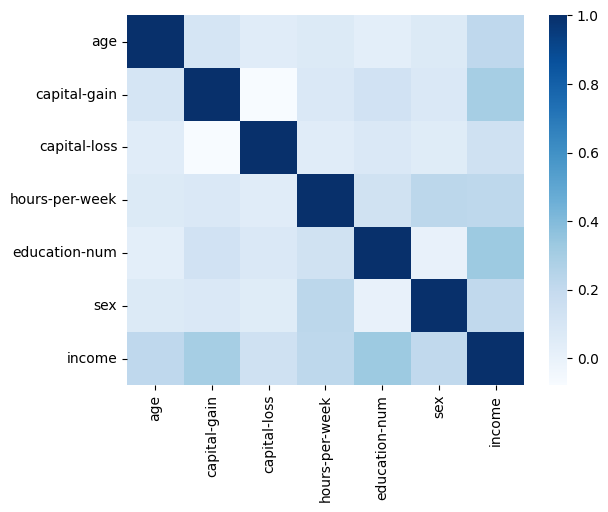

In [ ]:
hm = df_svm.corr()
sns.heatmap(hm, cmap='Blues', annot=False, fmt='d', cbar=True)

In [ ]:
X_data = df_svm.drop('income', axis=1)
y_data = df_svm['income']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=42)

In [ ]:
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (35316, 6)
Test data shape: (3924, 6)


In [ ]:
clf = GridSearchCV(SVC(), {
    'C': [1, 10, 20],
    'kernel': ['rbf', 'linear', 'poly']
}, return_train_score=False)

clf.fit(X_train, y_train)
clf.cv_results_

{'mean_fit_time': array([21.41278024, 12.9541091 , 19.44373884, 26.69292994, 15.53197856,
        45.34427662, 37.07170229, 18.64521904, 76.53914466]),
 'std_fit_time': array([3.12567469, 0.17625809, 0.63538771, 0.84677996, 0.30685532,
        1.31543924, 1.32919151, 1.23521273, 9.37186318]),
 'mean_score_time': array([4.57406063, 1.85614634, 1.83894558, 4.36560078, 2.37302461,
        1.83727398, 3.85475106, 1.85931973, 2.02153697]),
 'std_score_time': array([0.74334181, 0.00612663, 0.01077344, 0.66746415, 0.64083708,
        0.04655828, 0.01641814, 0.01420336, 0.33054551]),
 'param_C': masked_array(data=[1, 1, 1, 10, 10, 10, 20, 20, 20],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value=999999),
 'param_kernel': masked_array(data=['rbf', 'linear', 'poly', 'rbf', 'linear', 'poly',
                    'rbf', 'linear', 'poly'],
              mask=[False, False, False, False, False, False, False, False,
            

In [ ]:
print(f"Training best score: {clf.best_score_}")
print(f"Best parameters: {clf.best_params_}")

Best score: 0.8227714884114479
Best parameters: {'C': 20, 'kernel': 'rbf'}


In [ ]:
y_pred_test = clf.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.value_counts()

,count
0,
0,3358
1,566


In [ ]:
y_pred_train = clf.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.value_counts()

,count
0,
0,30318
1,4998


In [ ]:
acc_test = accuracy_score(y_test, y_pred_test)
acc_train = accuracy_score(y_train, y_pred_train)
print(f"Test Accuracy:{acc_test}")
print(f"Train Accuracy:{acc_train}")

Test Accuracy:0.8259429153924567
Train Accuracy:0.8245554422924454


In [ ]:
cm_test = confusion_matrix(y_test, y_pred_test, labels=[0, 1])
cm_train = confusion_matrix(y_train, y_pred_train, labels=[0, 1])
print("Test Confusion Matrix :")
print(cm_test)
print("Train Confusion Matrix :")
print(cm_train)

Test Confusion Matrix :
[[2811  136]
 [ 547  430]]
Train Confusion Matrix :
[[25220  1098]
 [ 5098  3900]]


In [ ]:
f1_test = f1_score(y_test, y_pred_test, average='weighted')
f1_train = f1_score(y_train, y_pred_train, average='weighted')
print(f"F1 Test score: {f1_test}")
print(f"F1 Train score: {f1_train}")

F1 Test score: 0.8084346990139506
F1 Train score: 0.8056802847260868


In [ ]:
print("\nClassification Report (Testing Set):\n", classification_report(y_test, y_pred_test))


Classification Report (Testing Set):
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      2947
           1       0.76      0.44      0.56       977

    accuracy                           0.83      3924
   macro avg       0.80      0.70      0.72      3924
weighted avg       0.82      0.83      0.81      3924



### k-nearest neighbors algorithm
**pros**
- No training phase: It’s a non-parametric model, meaning it doesn’t require explicit training. All the data points are stored, and predictions are made during the testing phase.
- Adaptive to the data: K-NN can adapt to the distribution of the data and doesn’t require prior assumptions (e.g., linearity or normality).

**cons**
- Requires feature scaling and senstive to noise
- K-NN can suffer from the curse of dimensionality
- Computationally expensive: As the number of data points increases, the distance calculation and sorting become slower. This makes K-NN inefficient for large datasets.

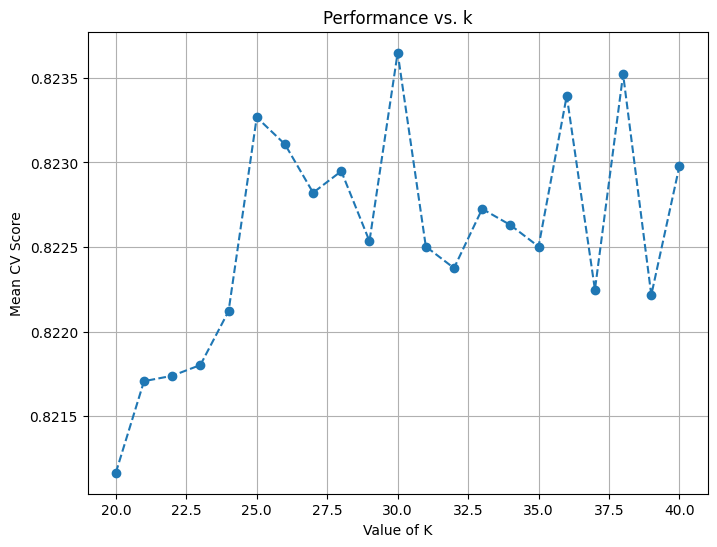

Optimal K:  30


In [ ]:
k_range = range(20, 41)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(np.mean(cv_scores))

# Plot K vs Accuracy
plt.figure(figsize=(8, 6))
plt.plot(k_range, scores, marker='o', linestyle='--')
plt.xlabel('Value of K')
plt.ylabel('Mean CV Score')
plt.title('Performance vs. k')
plt.grid()
plt.show()


optimal_k = k_range[np.argmax(scores)]
print("Optimal K: ",optimal_k)


In [ ]:
# make KNN with differences metrics
distance_metrics = ['euclidean', 'manhattan','chebyshev', 'cosine']
metric_performance = {}

for metric in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=optimal_k, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metric_performance[metric] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1}

print(pd.DataFrame(metric_performance).T)


           accuracy  precision    recall  f1_score
euclidean  0.827727   0.820528  0.827727  0.822486
manhattan  0.829511   0.822253  0.829511  0.824098
chebyshev  0.801988   0.787070  0.801988  0.781738
cosine     0.828109   0.821489  0.828109  0.823495


The evaluation of KNN with different distance metrics shows **Manhattan Distance** performing best with an accuracy of **82.95%**, followed closely by **Euclidean** (**82.77%**) and **Cosine** (**82.81%**), all showing consistent precision, recall, and F1-scores. In contrast, **Chebyshev Distance** performed the worst, with an accuracy of **80.19%**. Overall, **Manhattan Distance** proves to be the most effective.

Training Accuracy: 0.8357861875637105
Training F1 Score: 0.8302427409253926
Testing Accuracy: 0.8277268093781855
Testing F1 Score: 0.8224860086321585

Classification Report (Testing Set):
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      5883
           1       0.69      0.58      0.63      1965

    accuracy                           0.83      7848
   macro avg       0.78      0.74      0.76      7848
weighted avg       0.82      0.83      0.82      7848



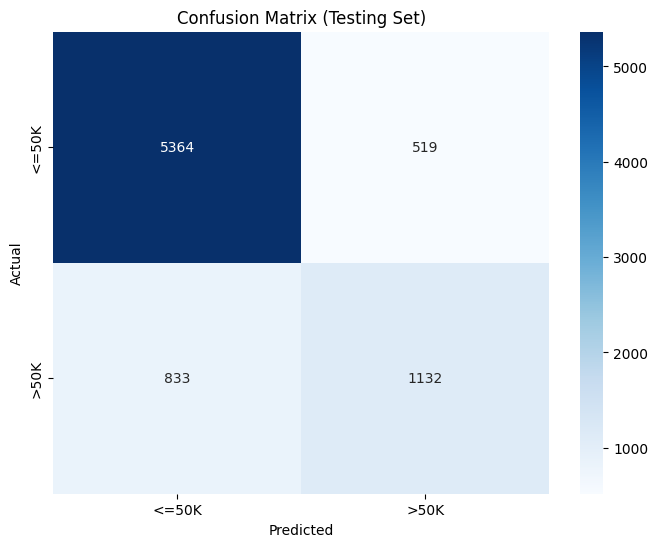

In [ ]:
# KNN Model with optimal K
knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final.fit(X_train, y_train)

#model evaluation

# Predictions for the training set
y_pred_train = knn_final.predict(X_train)  # Use 'knn_final' as the trained model

# Predictions for the testing set
y_pred_test = knn_final.predict(X_test)  # Use 'knn_final' as the trained model

# Calculate accuracy and F1 score for the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train, average='weighted')  # Use 'weighted' to account for imbalanced classes

# Calculate accuracy and F1 score for the testing set
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test, average='weighted')  # Use 'weighted' to account for imbalanced classes

# Classification report and confusion matrix for the testing set
report_test = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Print training and testing performance
print("Training Accuracy:", accuracy_train)
print("Training F1 Score:", f1_train)
print("Testing Accuracy:", accuracy_test)
print("Testing F1 Score:", f1_test)

# Print Classification Report for testing set
print("\nClassification Report (Testing Set):\n", report_test)

# Plot Confusion Matrix for the testing set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Testing Set)')
plt.show()



The model demonstrates strong performance, with training accuracy of 83.58% and testing accuracy of 82.77%. The F1 score is also consistent, with 83.02% on the training set and 82.24% on the testing set. The classification report for the testing set reveals that class <=50K , the majority class, performs well with a precision of 0.87, recall of 0.91, and F1 score of 0.89. In contrast, class >50K, the minority class, shows lower performance with a precision of 0.69, recall of 0.57, and F1 score of 0.63. The overall accuracy is 83%, and the weighted average shows strong performance due to the dominance of class <=50K in the dataset. The macro average, which treats all classes equally, reveals slightly lower performance, reflecting the challenges the model faces with the minority class.

### Naive Bayes Algorithm


- Using `education-num` as continouous feature
- Using `sex` as label encoded feature

In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gaussian Naive Bayes model
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions for the training set
y_pred_train = gnb.predict(X_train)

# Make predictions for the testing set
y_pred_test = gnb.predict(X_test)

# Calculate accuracy and F1 score for the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train, average='weighted')  # Use 'weighted' to account for imbalanced classes

# Calculate accuracy and F1 score for the testing set
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test, average='weighted')  # Use 'weighted' to account for imbalanced classes

# Classification report and confusion matrix for the testing set
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Print training and testing performance
print("Training Accuracy:", accuracy_train * 100)
print("Training F1 Score:", f1_train * 100)
print("Testing Accuracy:", accuracy_test * 100)
print("Testing F1 Score:", f1_test * 100)

# Print Confusion Matrix for testing set
print("\nConfusion Matrix (Testing Set):")
print(conf_matrix)


Training Accuracy: 57.645259938837924
Training F1 Score: 59.328081480495754
Testing Accuracy: 57.403160040774715
Testing F1 Score: 59.25521409498319

Confusion Matrix (Testing Set):
[[2686 3197]
 [ 146 1819]]


Before proceeding with Naive Bayes Classifier we need to know its assumptions so we can apply it into out dataset.
### **Assumptions of Naive Bayes**

- **Feature independence:** The features of the data are conditionally independent of each other, given the class label.
- **Continuous features are normally distributed:** If a feature is continuous, then it is assumed to be normally distributed within each class.
- **Discrete features have multinomial distributions:** If a feature is discrete, then it is assumed to have a multinomial distribution within each class.
- **Features are equally important:** All features are assumed to contribute equally to the prediction of the class label.
- **No missing data:** The data should not contain any missing values.

In [ ]:
#defining and encoding categorical columns
categorical_cols = ['workclass', 'education_level', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
categorical_data = pd.get_dummies(data, columns=categorical_cols, dtype=int)
categorical_data.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13.0,2174.0,0.0,40.0,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13.0,0.0,0.0,13.0,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9.0,0.0,0.0,40.0,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7.0,0.0,0.0,40.0,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13.0,0.0,0.0,40.0,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#defining numerical continuos columns
continuous_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']
continuous_data = data[continuous_cols]
continuous_data.head()

,age,capital-gain,capital-loss,hours-per-week
0,39,2174.0,0.0,40.0
1,50,0.0,0.0,13.0
2,38,0.0,0.0,40.0
3,53,0.0,0.0,40.0
4,28,0.0,0.0,40.0


Note that we didn't mention
`education-num` in the `continuous-cols` even though it's numeric but it's actualy an ordinal categorical numeric feature each corresponding to a rank or order of education levels

In [ ]:
le = LabelEncoder()
processed_data = pd.concat([categorical_data, continuous_data], axis=1)
processed_data['income'] = le.fit_transform(data['income'])
processed_data.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,age,capital-gain,capital-loss,hours-per-week
0,39,13.0,2174.0,0.0,40.0,0,0,0,0,0,...,0,0,0,1,0,0,39,2174.0,0.0,40.0
1,50,13.0,0.0,0.0,13.0,0,0,0,0,0,...,0,0,0,1,0,0,50,0.0,0.0,13.0
2,38,9.0,0.0,0.0,40.0,0,0,0,1,0,...,0,0,0,1,0,0,38,0.0,0.0,40.0
3,53,7.0,0.0,0.0,40.0,0,0,0,1,0,...,0,0,0,1,0,0,53,0.0,0.0,40.0
4,28,13.0,0.0,0.0,40.0,0,0,0,1,0,...,0,0,0,0,0,0,28,0.0,0.0,40.0


In [ ]:
x = processed_data.drop('income', axis=1)
y = processed_data['income']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
X_train.head()

X_train shape: (36177, 107)
X_test shape: (9045, 107)


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,age,capital-gain,capital-loss,hours-per-week
7963,32,13.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,1,0,0,32,0.0,0.0,40.0
26402,45,12.0,0.0,0.0,66.0,0,0,1,0,0,...,0,0,0,0,0,1,45,0.0,0.0,66.0
31411,45,7.0,0.0,0.0,50.0,0,0,0,0,1,...,0,0,0,1,0,0,45,0.0,0.0,50.0
13367,39,9.0,0.0,0.0,70.0,0,0,0,1,0,...,0,0,0,1,0,0,39,0.0,0.0,70.0
38742,51,9.0,0.0,0.0,38.0,0,0,0,0,0,...,0,0,0,1,0,0,51,0.0,0.0,38.0


In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("f1_score:",f1)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8297401879491432
f1_score: 0.6506352087114338
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      6745
           1       0.68      0.62      0.65      2300

    accuracy                           0.83      9045
   macro avg       0.78      0.76      0.77      9045
weighted avg       0.83      0.83      0.83      9045

Confusion Matrix:
 [[6071  674]
 [ 866 1434]]


### Logistic Regression

In [ ]:
# Import necessary libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression


# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Define hyperparameter grid for tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10],        # Regularization strength
    'penalty': ['l1', 'l2'],        # Regularization type (L1, L2)
    'solver': ['liblinear', 'saga'] # Solvers (liblinear or saga for L1 regularization)
}

# Apply GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print best parameters from GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Train the Logistic Regression model with the best parameters
best_log_reg = grid_search.best_estimator_

# Make predictions for the training set
y_pred_train = best_log_reg.predict(X_train)

# Make predictions for the testing set
y_pred_test = best_log_reg.predict(X_test)

# Calculate accuracy and F1 score for the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train, average='weighted')  # Use 'weighted' to account for imbalanced classes

# Calculate accuracy and F1 score for the testing set
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test, average='weighted')  # Use 'weighted' to account for imbalanced classes

# Classification report and confusion matrix for the testing set
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Print training and testing performance
print("Training Accuracy:", accuracy_train * 100)
print("Training F1 Score:", f1_train * 100)
print("Testing Accuracy:", accuracy_test * 100)
print("Testing F1 Score:", f1_test * 100)

# Print Confusion Matrix for testing set
print("\nConfusion Matrix (Testing Set):")
print(conf_matrix)

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Training Accuracy: 83.46075433231397
Training F1 Score: 82.85234317810657
Testing Accuracy: 84.30173292558614
Testing F1 Score: 83.83793411164876

Confusion Matrix (Testing Set):
[[5420  463]
 [ 769 1196]]


### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Accuracy: 0.813
Precision: 0.608
Recall: 0.612
F1 Score: 0.610


- **Tuning Decision tree parameters**

In [ ]:
from sklearn.model_selection import  GridSearchCV
from sklearn.tree import DecisionTreeClassifier


param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # Adding 'log_loss' for classification
    'max_depth': [None, 5, 10, 15, 20, 30, 50],  # Exploring deeper trees
    'min_samples_split': [2, 5, 10, 20, 50],  # Increasing range for splitting
    'min_samples_leaf': [1, 2, 4, 8, 16],  # Adding smaller and larger leaf sizes
    'max_features': [None, 'sqrt', 'log2'],  # Adding feature selection criteria
    'splitter': ['best', 'random']  # Trying different splitting strategies
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='f1',n_jobs=-1) #n_jobs=-1 to use all processors
grid_search.fit(X_train, y_train)

print("\nBest Hyperparameters:", grid_search.best_params_)
print("\nBest f1 score:", grid_search.best_score_)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

# Provided Best Hyperparameters
best_params = {
    'criterion': 'entropy',
    'max_depth': 20,
    'max_features': None,
    'min_samples_leaf': 2,
    'min_samples_split': 50,
    'splitter': 'best'
}

# Train the model with the best hyperparameters
best_model = DecisionTreeClassifier(
    criterion=best_params['criterion'],
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    splitter=best_params['splitter'],
    random_state=42
)

# Fit the model to the training data
best_model.fit(X_train, y_train)

# Predictions for training and testing datasets
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Evaluate performance on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Evaluate performance on testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print evaluation metrics
print(f"Training Accuracy: {train_accuracy:}")
print(f"Training F1 Score: {train_f1:}")
print(f"Testing Accuracy: {test_accuracy:}")
print(f"Testing F1 Score: {test_f1:}")


Training Accuracy: 0.8751416645935263
Training F1 Score: 0.8707391512897469
Testing Accuracy: 0.8560530679933664
Testing F1 Score: 0.8504293348074442


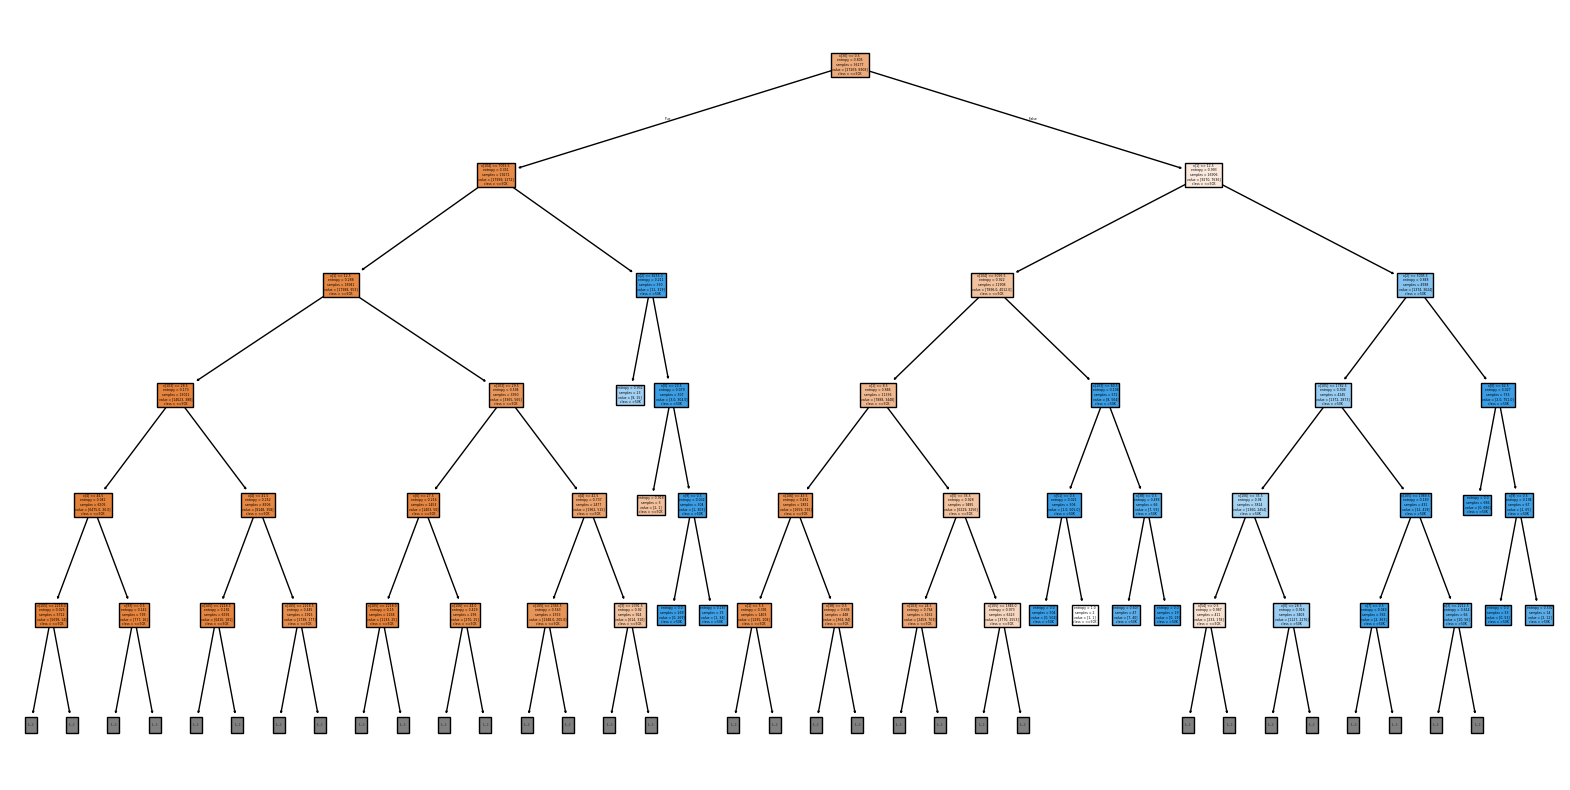

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(best_model,max_depth=5, class_names=['<=50K', '>50K'], filled=True)
plt.show()


## **Comperative Analysis**

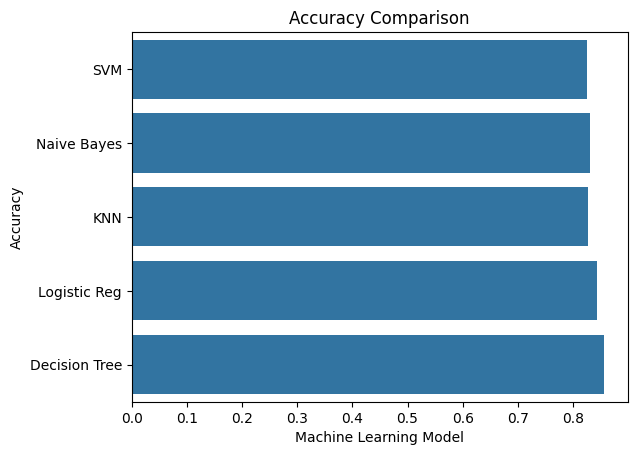

In [ ]:
models = ["SVM", "Naive Bayes", "KNN" , "Logistic Reg", "Decision Tree"]
accuracies = [0.8259429153924567,0.8297401879491432, 0.8277268093781855,0.8430173292558614,0.8560530679933664]

fig, ax = plt.subplots()
barplot = sns.barplot(x=accuracies, y=models, ax=ax)

# Set the title and labels#
plt.title("Accuracy Comparison")
plt.xlabel("Machine Learning Model")
plt.ylabel("Accuracy")

plt.show()

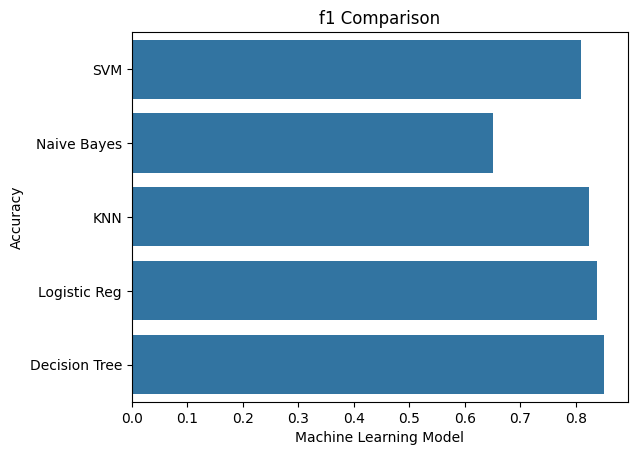

In [ ]:
models = ["SVM", "Naive Bayes", "KNN" , "Logistic Reg", "Decision Tree"]
f1_scores = [0.8084346990139506,0.6506352087114338,0.8224860086321585,0.8383793411164876,0.8504293348074442]

fig, ax = plt.subplots()
barplot = sns.barplot(x=f1_scores, y=models, ax=ax)

# Set the title and labels#
plt.title("f1 Comparison")
plt.xlabel("Machine Learning Model")
plt.ylabel("F1-scores")

plt.show()

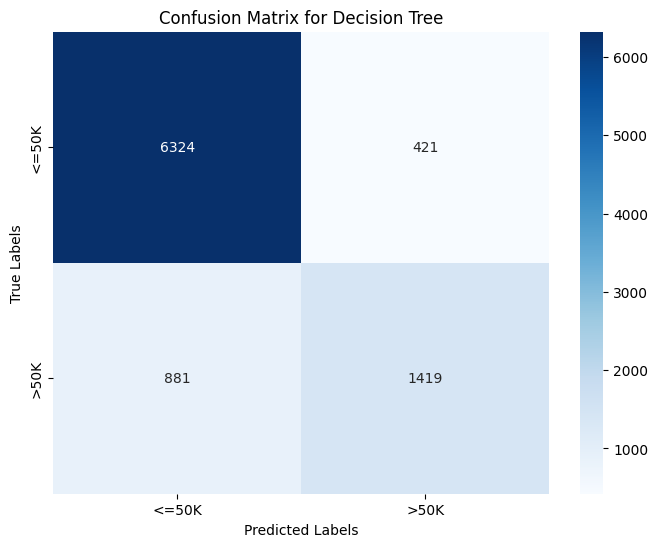

Classification Report for Decision Tree:
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      6745
        >50K       0.77      0.62      0.69      2300

    accuracy                           0.86      9045
   macro avg       0.82      0.78      0.80      9045
weighted avg       0.85      0.86      0.85      9045

Testing Accuracy: 0.8560530679933664
Testing F1 Score: 0.8504293348074442


In [ ]:
# as we notice the Decision Tree is the best F1_score and Accuracy

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions for the test dataset
y_test_pred = best_model.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the classification report
report = classification_report(y_test, y_test_pred, target_names=['<=50K', '>50K'])
print("Classification Report for Decision Tree:")
print(report)

# Evaluate performance on testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
print(f"Testing Accuracy: {test_accuracy:}")
print(f"Testing F1 Score: {test_f1:}")


In [ ]:
# # comparison between all confusion matrices : (but this code need to run SVM and other models again )

# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# import matplotlib.pyplot as plt
# import seaborn as sns

# def comparative_analysis(models, model_names, X_test, y_test):
#     """
#     Compare classifiers by generating confusion matrices and evaluation metrics.

#     Parameters:
#         models (list): List of trained classifier models.
#         model_names (list): List of model names corresponding to the models.
#         X_test (DataFrame): Features for testing.
#         y_test (Series): True labels for testing.
#     """

#     results = []  # Store evaluation metrics for each model

#     for model, name in zip(models, model_names):
#         print(f"Evaluating {name}...")

#         # Make predictions
#         y_pred = model.predict(X_test)

#         # Compute confusion matrix
#         cm = confusion_matrix(y_test, y_pred)

#         # Display confusion matrix using seaborn
#         plt.figure(figsize=(6, 5))
#         sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
#         plt.title(f"Confusion Matrix for {name}")
#         plt.xlabel("Predicted")
#         plt.ylabel("Actual")
#         plt.show()

#         # Compute additional metrics
#         accuracy = accuracy_score(y_test, y_pred)
#         report = classification_report(y_test, y_pred, target_names=['<=50K', '>50K'])

#         # Display metrics
#         print(f"Accuracy for {name}: {accuracy:.3f}\n")
#         print(f"Classification Report for {name}:\n{report}\n")

#         # Append results for further comparison if needed
#         results.append({
#             'Model': name,
#             'Accuracy': accuracy,
#             'Confusion Matrix': cm
#         })

#     return results

# # Define the models and their names
# models = [clf, knn_final, nb_model, best_log_reg, best_model]
# model_names = ["SVM", "KNN", "Naive Bayes", "Logistic Regression", "Decision Tree"]

# # Call the function to compare models
# results = comparative_analysis(models, model_names, X_test, y_test)


- **Conclusion**:
  - **Best Algorithm:** Decision Tree

